# Biogeochemistry Spinup
This notebook explains how to do the spinup for the biogeochemistry module. It assumes that a spin-up simulation without the biogeochemistry module has alrady been performed. See the [Code Walkthrough](TnC-Code_Walkthrough.ipynb) for an example on how to do this. The procedure and the code used here are based on a video tutorial provided by Simone Fatichi. 
## 0. Setup
We will add a folder to the matlab path that has a few functions defined that we will use here.

In [8]:
addpath("biogeochemistry_spinup_functions");

We also need to add a folder containing the T&C source code, including the script `Biogeo_environment`. Make sure that in the file `Biogeochemistry_IO` the path to the deposition data is set correctly.

In [12]:
addpath("T&C_CODE");

## 1. Load results from spinup

In [27]:
path_to_results = "C:\Users\fcbauer\OneDrive - epfl.ch\Desktop\Software\T&C with Crop\results\Ris_Rothamsted-sow_harvest_sow-spinup.mat"; %! <- This has to point to the output of your spinup (without the biogeochemistry)
load(path_to_results);

### 1.a If simulations include woody vegetation
If your vegetation includes wook, you will have to derive the wood turnover coefficient (`Wm_H` and/or `Wm_L`) after the first spinup. You should then run a second spinup with the parameter file containing the correct values for this coefficient. See Simone Fatichi's tutorial video for details.

## 2. Run biogeochemistry spinup

You will have to provide the latitude `Lat` and longitude `Lon` as arguments to the function below, as well as the number of years for how long you want to run the simulation and a path to a file holding deposition data.

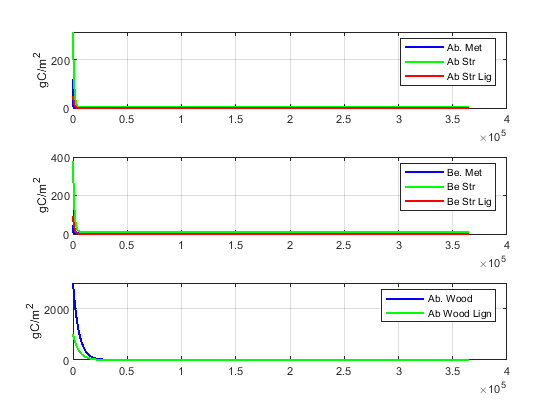

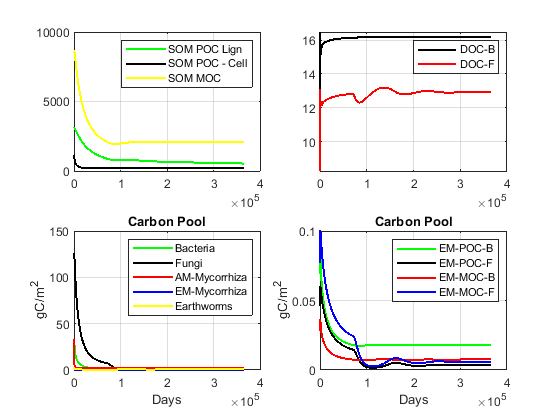

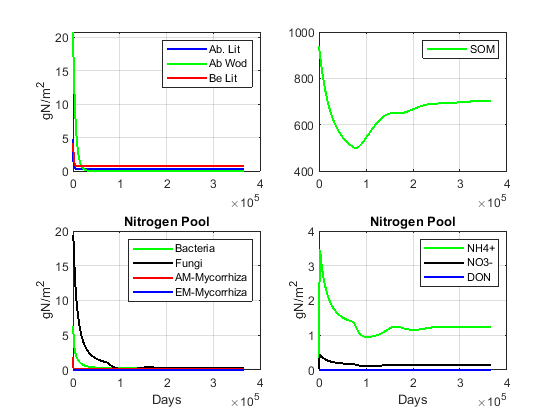

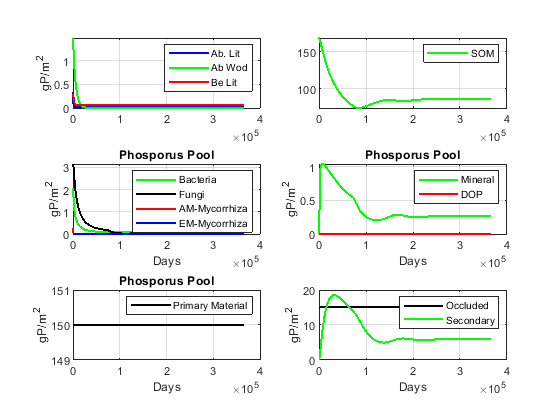

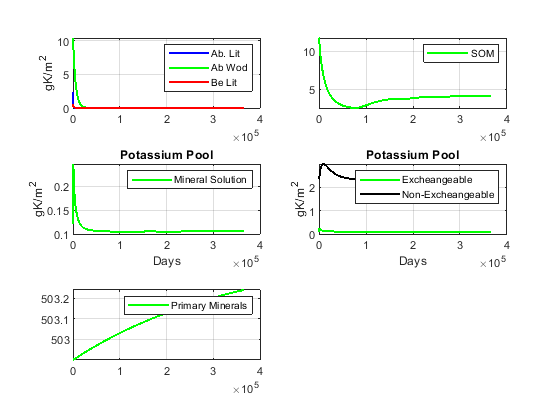

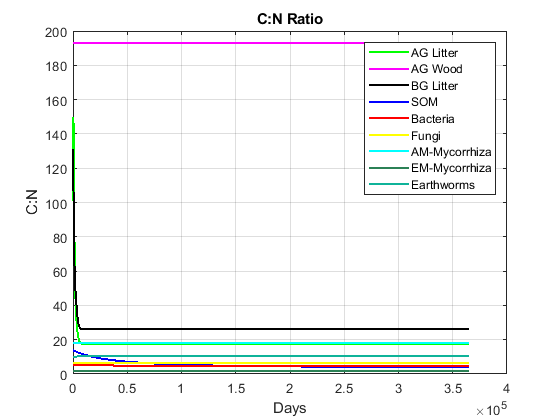

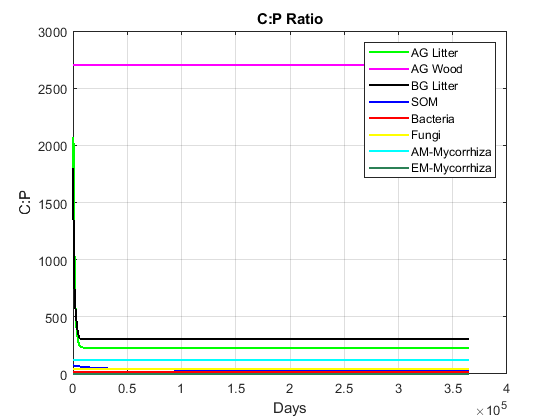

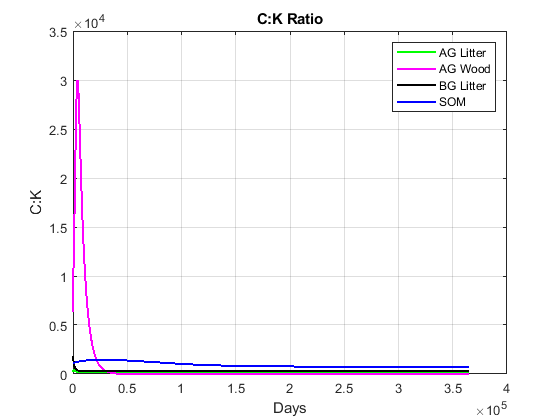

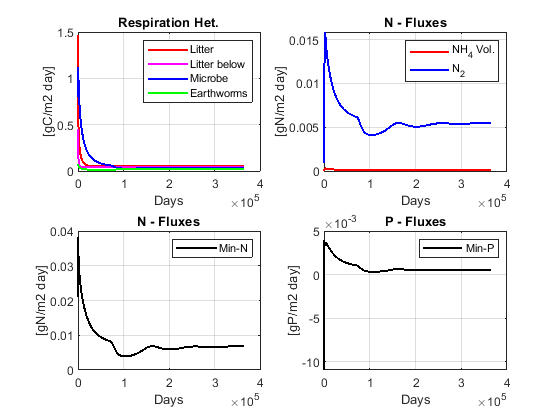

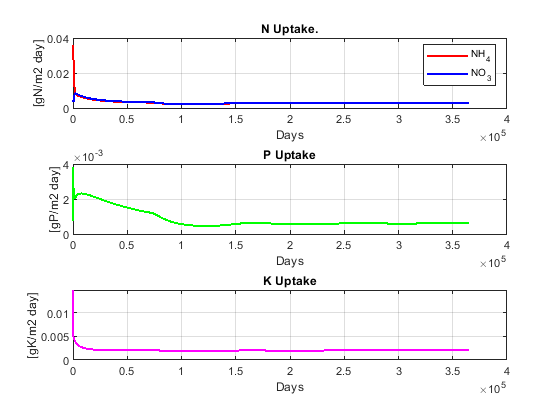

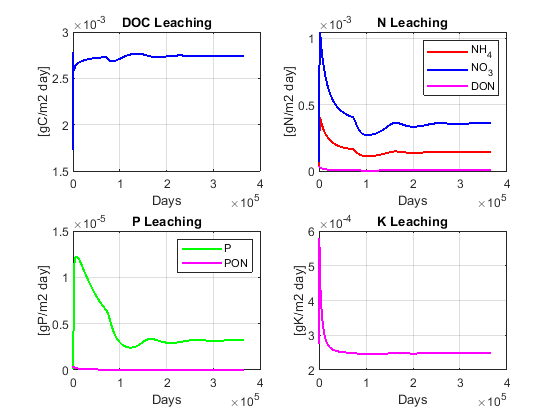

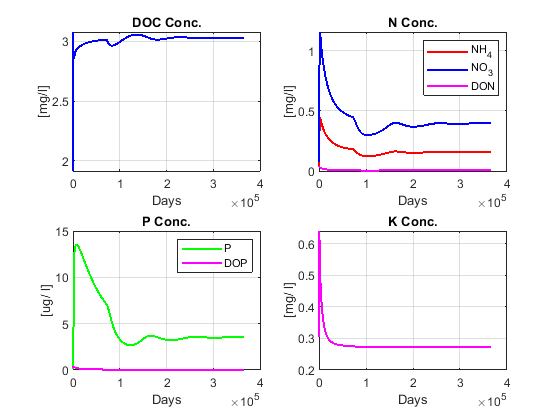

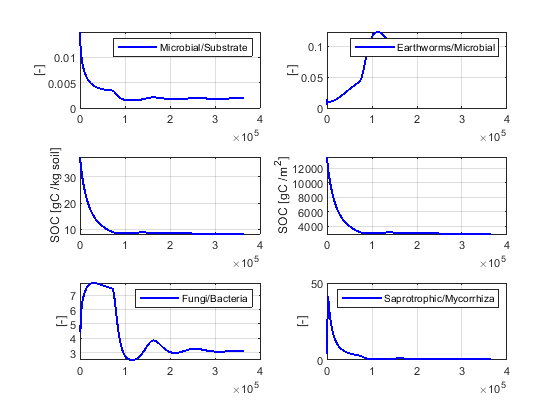

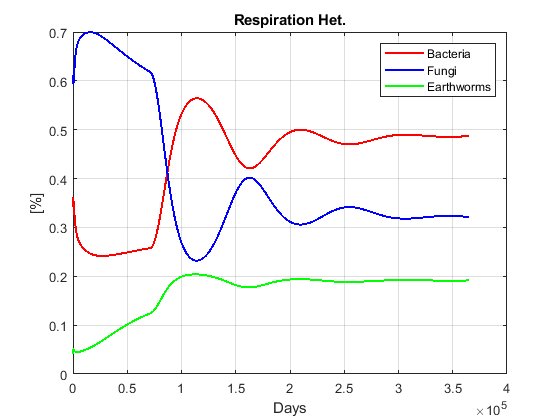

In [28]:
%Lat = 51.80946;
%Lon = -0.37301;
Nyears = 1000;
path_deposition_data = "data\Inputs\All_deposition_data.mat";

[Se, Se_fc, Psi_s, Ts, V, VT] = bg_preprocess(Ta, Tdp, O, V, Soil_Param, Phy, SPAR, Bio_Zs);
[B, R_litter, R_litter_sur, R_microbe, R_bacteria, R_ew, VOL, BfixN, Min_N, Min_P, RmycAM, RmycEM, ...
    N2flx, NH4_Uptake, NO3_Uptake, P_Uptake, K_Uptake, LEAK_NH4, LEAK_NO3, LEAK_P, LEAK_K, LEAK_DOC, ...
    LEAK_DON, LEAK_DOP, Lk] = bg_spinup(Lat, Lon, Nyears, ISOIL_H+ISOIL_L, Zbio, rsd, ...
    Pcla, Psan, PHs, Zs, Ts, Ta, Psi_s, Se, Se_fc, V, VT, T_L, T_H, Lk, RexmyI, Ccrown, B_H+B_L);
bg_plot(B, R_litter, R_litter_sur, R_microbe, R_bacteria, R_ew, VOL, BfixN, Min_N, Min_P, RmycAM, RmycEM, ...
    N2flx, NH4_Uptake, NO3_Uptake, P_Uptake, K_Uptake, LEAK_NH4, LEAK_NO3, LEAK_P, LEAK_K, LEAK_DOC, ...
    LEAK_DON, LEAK_DOP, Lk, Zbio, rsd);

## 4. Export relevant variables

In [ ]:
B_end = B(end, :);
save("biogeo_spinup", "B_end");